# Introduction

* Deep Learning is a very powerful subset of machine learning.
* It has produced very impressive results in computer vision and Natural Language Processing (NLP)
* Resource intensive deep-learning solutions are possible:
  - Big Data
  - Improved processing power
  - Improved internet speeds
  - Parallel computing hardware and software

# Keras and Tensorflow

* Keras offers a friendly interface to Google's TensorFlow
* The Google DeepMind team developed Keras to make deep-learning capabilities accessible
* Google has several projects that are based on deep-learning concepts

# Models

* Deep Learning models connect multiple layers
* Models encapsulate some mathematical algorithms some of which are highly complex
  - Simplify the process by just defining the parametrs and you manipulate the data yourself
* Keras helps you during experimentation
* More data leads to better trained learning models
* Deep learning requires a lot of processing power. That's why we have high performance using GPU's (Graphics Processing Units) and TPU's (Tensor Processing Units - Google)

# Applications

* Gameplay
* Computer Vision
* Self driving cars
* Google search
* Enhancing image resolution
* Predicting weather conditions and earthquakes

# Keras built-in datasets

* MNIST dataset - handwritten characters and digits
* Fashion - MNIST datatet on articles of clothing
* IMDB - Movie Reviews - NLP & Recurrent Neural Networks (RNN)
* CIFAR10 small image classification; contains 10 categories of items & CIFAR100 contains 100 categories of items

# How Artificial Nerual Networks decide whether to activate synapses

* As the network trains, the aim is to minimise the error rate - the difference between network predicted value and the actual
* The error rate is what we call the loss
* The calculation that determines the loss is the loss function
* Backpropagation - During training, the network determines the amount that each neuron contributes to the loss and then adjusts the weights in an effort to minimize the loss

# Tensors

- Deep learning frameworks manipulate data in the form of tensors
- The tensorflow framework packs all the data from the multidimensional array  into one or more tensors used for mathematical calculations by the ANN to learn
- Tensors can ge very large
  - 0D scalar
  - 1D tensor - vector (2,3,4,5,6)
  - 2D tensor -> 2D array(matrix)
  - 3D tensor -> 3D array color image with width, height and depth(RGB)
  - 4d tensor -> collection of color images in 3D tensors
  - 5D tensor -> 4D tensor that contains videos

In [15]:
import tensorflow as tf

In [16]:
# initialize a 500 x 500 tensor with elements equal to 0.5
a = tf.ones([500,500]) * 0.5

In [17]:
a

<tf.Tensor: shape=(500, 500), dtype=float32, numpy=
array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)>

In [18]:
  import numpy as np

In [19]:
m1 = [[1.0,2.0], [3.0, 4.0]]

In [20]:
m2 = np.array([[1.0, 2.0],[3.0, 4.0]], dtype=np.float32)

In [21]:
m1

[[1.0, 2.0], [3.0, 4.0]]

In [22]:
m2

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [23]:
m3 = tf.constant([[1.0, 2.0], [3.0, 4.0]])

In [24]:
m3

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [25]:
type(m1)

list

In [26]:
type(m2)

numpy.ndarray

In [27]:
type(m3)

tensorflow.python.framework.ops.EagerTensor

# Convolutional Neural Networks for Vision: Multi-Classification with the MNIST dataset

In [28]:
from tensorflow.keras.datasets import mnist

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [30]:
x_train.shape # 60,000 images of pixel size 28 x 28

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

# Visualizing the data

In [32]:
%matplotlib inline

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# visualize some set of digits

import numpy as np

In [35]:
index = np.random.choice(np.arange(len(x_train)), 24, replace=False)

In [36]:
index

array([26786, 18177,  4111, 38596, 17502,  3060, 26248, 18027, 43081,
        6957, 47372, 56624, 57362, 42094, 42305,  4368, 59057, 43058,
         639, 39611, 58011, 56357,  5883, 34697])

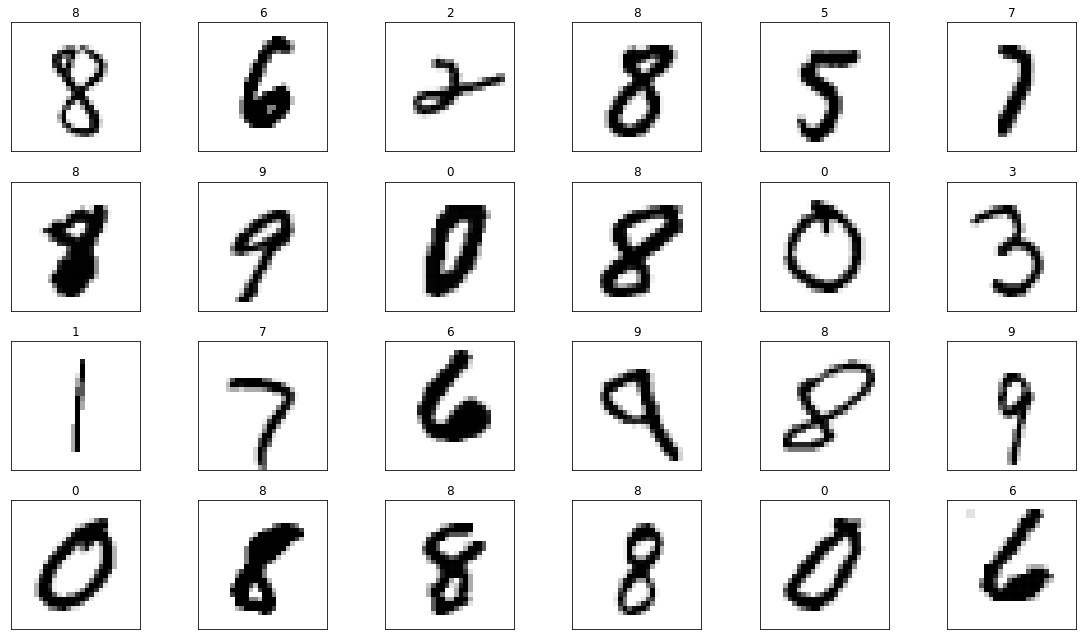

In [37]:
# ravel is basically flattening an array while still maintaining the index
# see: https://www.geeksforgeeks.org/numpy-ravel-python/
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16,9))
for item in zip(axes.ravel(), x_train[index], y_train[index]):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(target)
plt.tight_layout()

* The data in Scikit-learn is preprocessed into shapes that the model can consume
* MNIST dataset requires some preparation for use in Keras
* Keras conventions require a Numpy array
* Each sample must have the shape as (width, height, channels) -- currently the data is (28, 28, 1) since the data is grayscale the number of channels is 1
* The Neural Network learns from the images it creates
  - The channels represent complex features like edges, curves and lines

# Reshaping the Data

In [38]:
x_train = x_train.reshape((60000,28,28,1))

In [39]:
x_train.shape

(60000, 28, 28, 1)

In [40]:
x_test = x_test.reshape((10000,28,28,1))

In [41]:
x_test.shape

(10000, 28, 28, 1)

# Normalising the Data

* Deep learning networks perform better on data that is normalized
* We normalize it within the range (0.0 - 1.0) - This helps in reducing the effect of values outside the range. The mean becomes 0 and the sd = 1
* We divide by 255 to normalize

In [42]:
x_train = x_train.astype('float32')/255

In [43]:
x_test = x_test.astype('float32')/255

# One-Hot Encoding: Convert the Labels to Categorical Data

* Predictions will be an array of 10 probabilities
* To evaluate model accuracy, what Keras does, it compares predictions to dataset's labels
  - The prediction must be the same shape as the label
  - Transform the labels into categorical data arrays matching the prediction format
  - For example for the number 7 our values will be [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
  - to_categorical() function in Keras does the one-hot encoding

In [44]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
from tensorflow.keras.utils import to_categorical

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
y_train.shape

(60000,)

In [48]:
y_train = to_categorical(y_train)

In [49]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [50]:
y_train.shape

(60000, 10)

In [51]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [52]:
y_test = to_categorical(y_test)

In [53]:
y_test.shape

(10000, 10)

# Creating the Neural Network

- Configure a Convolutional Neural Network (CNN)
- It is a sequential model that stacks layers and executes them sequentially
    - The output of one layer becomes the input to the next
    - It is a Feed Forward Network

In [54]:
from tensorflow.keras.models import Sequential

In [55]:
cnn = Sequential()

## Adding layers to the Network

- Input layers (typical convnets) receive the training samples.
- They consist of:
    - Hidden layers that learn from the training samples
    - Output layers that produce the predictions

In [56]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

## Convolution

- We start with a convolution layer
- It uses the relationships between pixels in close proximity to learn useful features(small areas of each sample)
- Let's examine convolution on a 6 x 6 image (6 pixels by 6 pixels)
- We use a 3 x 3 kernel
- The convolution performs calculations that run from the kernels 9 features, then outputs 1 new feature
- The kernel used is a 3 x 3, but others exist i.e. 5 x 5, 7 x 7
- The kernel size is a hyperparameter -> a value that can be manipulated for optimization.
- By looking at features near one another, the network begins to recognize features of out image -> edges, straight lines and curves
- A complete pass from left to right is called a filter
- If you use a 3 x 3 kernel, the output will be 2 less i.e. a 6 x 6 image will yield a 4 x 4 image
- In our case, a 28 x 28 image will yield a 26 x 26 image
- The number of filters in a convolutional layer is commonly 32 or 64.
- Each filter produces different results.
- High resolution images (many features) require more filters.
- A set of filters that are produced by a convolutional layer is called a `feature map`.
- After learning a feature, a network can recognize that feature anywhere in the image
    - This is one of the reasons why convnets are popular with object recognition.

In [57]:
# add the convolutional layer -- Conv2D
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

- When we say filters=64 this means that the number of filters in the resulting feature map is 64
- The kernel_size=(3,3) is the size of the kernel in each filter
- activation='relu' is called the Rectified Linear Unit activation function

# Dimensionality

- Deep Learning often requires a lot of processing power
- The inputs to the cnn from a 28x28 image with 64 features will be $28^2 * 1 = 784$
- the inputs from the convolutional layer will be $26^2 * 64 = 43,264$
- There is exponential growth of inputs from layer to layer requiring more processing power


# Overfitting

- Can occur if the model is too complex
- In Deep Learning overfitting occurs when the model dimensionality becomes too large.
- To prevent overfitting, we use pooling


# Adding a pooling layer

- To reduce overfitting and computational time, a convolutional layer is often followed by one or more layers that is meant to reduce dimensionality
- Pooling compresses (down-samples) the results by discarding features
- This helps in making the model more general
- The most commonly used pooling technique is called `max-pooling`
- A stride for a 2 by 2 pool is 2
- Four groups of features is reduced to 1 and a 26 x 26 x 64 becomes 13 x 13 x 64

In [58]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [59]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu')) # the output here is 11 by 11 by 128

In [60]:
# since the input here is an odd number it is rounded down to 10 by 10
# the output is 5 by 5 by 128
cnn.add(MaxPooling2D(pool_size=(2,2))) 

# Flattening the Results

- The model output that we expect should be a one dimensional array of 10 probabilities
- To prepare for one-dimensional predictions, we need to flatten the previous layer's output into one dimension
- The `Flatten` layer's output will be $5*5*128 = 3200$

In [61]:
cnn.add(Flatten())

# Adding a Dense Layer

- The Layer before the Flatten function learned the digit features
- Now we must learn the relationship among those features to classify which digit each image represents
- This is accomplished with fully connected Dense layers

In [62]:
cnn.add(Dense(units=128, activation='relu'))

- The above function creates 128 neurons(units) that will learn from the 3200 outputs from the Flatten layer
- We add another final `Dense` layer which outputs into neurons the classes 0-9
- The Softmax activation function converts values to these 10 neurons into `classification probabilities`

In [63]:
cnn.add(Dense(units=10, activation='softmax'))

In [64]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

- Parameters are generally the weights that the network learns during the training
- We have a small network but it needs to learn from nearly 500,000 parameters
- The value None on the output shape means the model does not know in advance how many training samples we will provide

# Visualizing the model's structure

- We can use plot_model() which is inbuilt into tensorflow

In [76]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

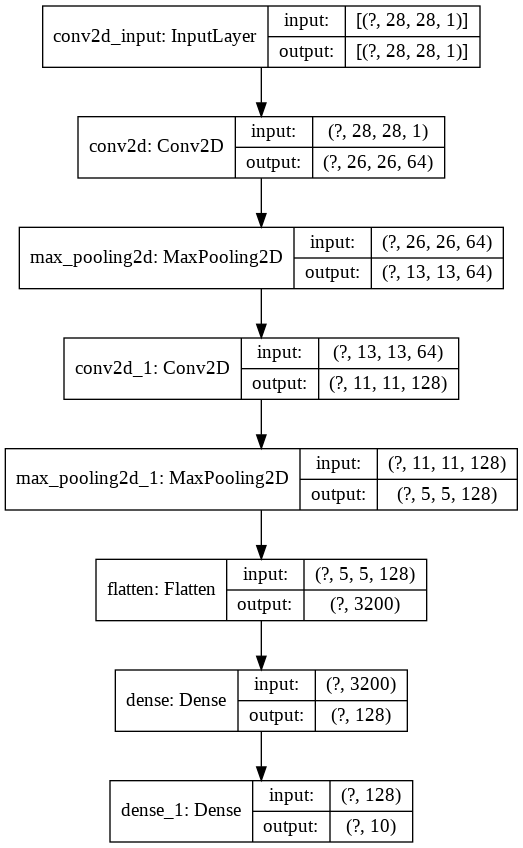

In [66]:
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png') # display the resulting image

# Compile the Model

- https://keras.io/api/optimizers

In [67]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- The adam optimizer is used to adjust the weights in the Neural Network(NN) as the network learns
- The loss function for the optimizer is a multi-classification (10 classes). For binary problems we would have used binary_crossentropy, for regression we would use mean_squared_error
- Accuracy is commonly used in the classification model.
- We use accuracy to check the correct predictions

# Training the model

- We use the fit model

In [68]:
# Epochs is the number of iterations we want when training the data
# batch_size is the number of items/samples to process at a time
# Most models use values with a base of 2 i.e. 32, 64 etc
# validation_split means we want to preserve the last 10% of values to validate that the model is working
cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 105s 124ms/step - loss: 0.1364 - accuracy: 0.9591 - val_loss: 0.0528 - val_accuracy: 0.9842
Epoch 2/10
844/844 [==============================] - 105s 124ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0416 - val_accuracy: 0.9882
Epoch 3/10
844/844 [==============================] - 104s 123ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 4/10
844/844 [==============================] - 104s 124ms/step - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0414 - val_accuracy: 0.9898
Epoch 5/10
844/844 [==============================] - 104s 124ms/step - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 6/10
844/844 [==============================] - 104s 124ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0341 - val_accuracy: 0.9920
Epoch 7/10
844/844 [==============================] - 105s 124ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0328 -

# Evaluating the model on unseen data

- We use the evaluate model

In [69]:
loss, accuracy = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0386 - accuracy: 0.9909


In [70]:
loss

0.03859524056315422

In [71]:
accuracy

0.9908999800682068

# Making predictions using `predict` method

In [72]:
predictions = cnn.predict(x_test)

In [73]:
predictions[0]

array([2.2258450e-15, 1.4248785e-14, 7.4038176e-10, 1.4988650e-09,
       4.1298853e-18, 1.1933052e-12, 6.0560503e-19, 1.0000000e+00,
       6.3303082e-14, 6.4296624e-11], dtype=float32)

In [74]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [75]:
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000740%
3: 0.0000001499%
4: 0.0000000000%
5: 0.0000000001%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000000064%


# Locating the incorrect values

- We want to view some incorrectly predicted images to see which digits is our model having trouble with.
- To do this, we compare the index of the largest probability in the predictions with the index containing a `1` in the actual value.
- If the 2 indices are the same it indicates that the prediction is correct



- We need to first reshape the samples from the shape (28, 28, 1) that Keras needed. Matplotlib requires data to be displayed as images (28, 28)

In [77]:
images = x_test.reshape((10000, 28, 28))

In [79]:
incorrect_predictions = []

In [80]:
for i, (p,e) in enumerate(zip(predictions, y_test)):
  predicted, expected = np.argmax(p), np.argmax(e)
  if predicted != expected:  # prediction is wrong
    incorrect_predictions.append((i, images[i], predicted, expected))

In [81]:
len(incorrect_predictions)

91

## Visualizing Incorrect Predictions

- We want to display 24 incorrectly predicted images
- We will show the value of predicted (p) and expected (e)

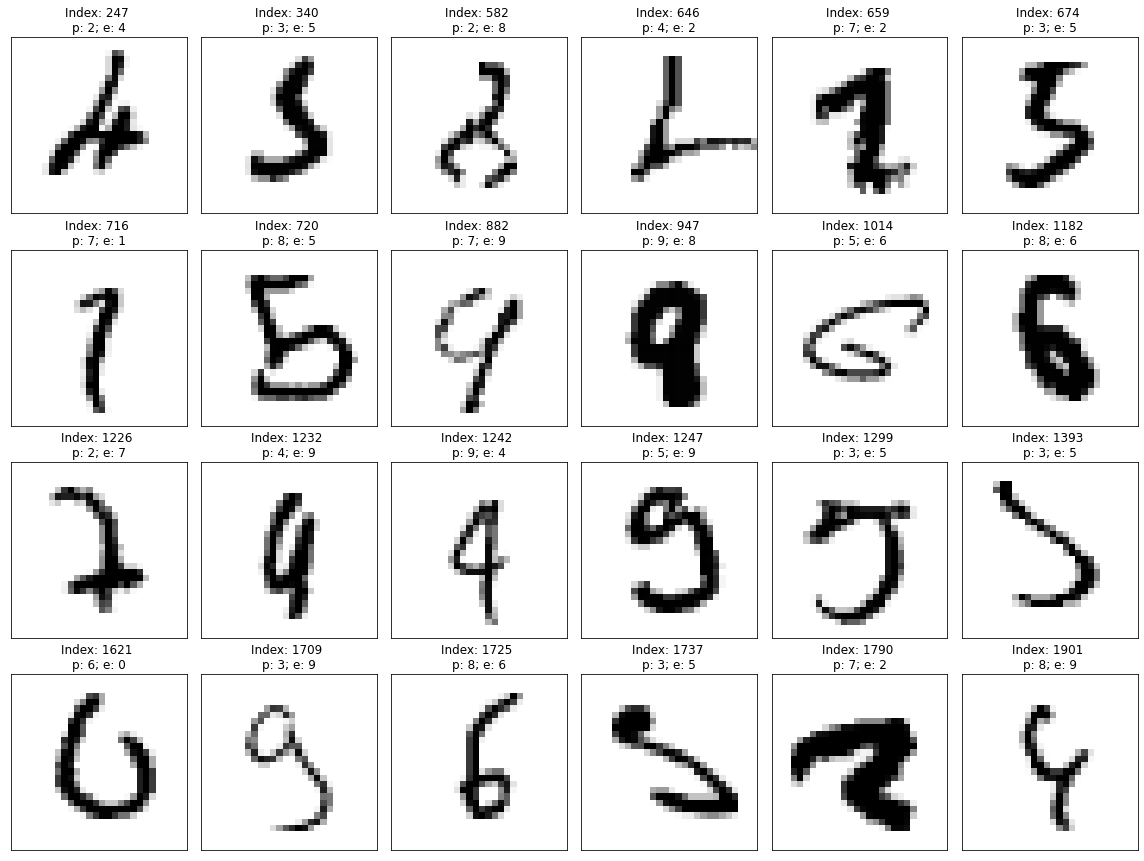

In [84]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
  index, image, predicted, expected = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  axes.set_xticks([])
  axes.set_yticks([])
  axes.set_title(f'Index: {index} \np: {predicted}; e: {expected}')
plt.tight_layout()

## Displaying the probabilities for the incorrect predictions

In [85]:
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
    print(f'{index}: {probability:.10%}')

In [86]:
display_probabilities(predictions[1790])

0: 0.0000085746%
1: 0.0005718880%
2: 2.5817289948%
3: 0.0000274889%
4: 0.0000000020%
5: 0.0000000002%
6: 0.0000000000%
7: 97.4174082279%
8: 0.0002609398%
9: 0.0000017134%


In [87]:
display_probabilities(predictions[1226])

0: 0.0000000000%
1: 0.0001881192%
2: 99.1656184196%
3: 0.0000093838%
4: 0.0000001097%
5: 0.0000000000%
6: 0.0000000000%
7: 0.8341818117%
8: 0.0000003701%
9: 0.0000000010%


## Saving and loading the model

- We can save the state of the model and call it later for use.
- Reasons for calling it later:
    - Make more predictions
    - Train more
    - Train for new problems
    - Transfer learning
- We save the model architecture and the state in a HDF5 format (Hierarchical Data Format)

In [89]:
cnn.save('mnist_cnn.h5')

In [90]:
# Loading the model
from tensorflow.keras.models import load_model

In [91]:
cnn = load_model('mnist_cnn.h5')